In [2]:
install.packages('lme4')

Installing package into ‘/home/jupyter/packages’
(as ‘lib’ is unspecified)



In [3]:
install.packages('MuMIn')

Installing package into ‘/home/jupyter/packages’
(as ‘lib’ is unspecified)



In [4]:
install.packages('sjPlot')

Installing package into ‘/home/jupyter/packages’
(as ‘lib’ is unspecified)



In [5]:
library(lme4)

Loading required package: Matrix



In [6]:
library(MuMIn)

In [7]:
library(sjPlot) #for plotting lmer and glmer mods
library(sjmisc) 
library(effects)
library(sjstats) #use for r2 functions

Install package "strengejacke" from GitHub (`devtools::install_github("strengejacke/strengejacke")`) to load all sj-packages at once!



ERROR: Error in library(effects): there is no package called ‘effects’


In [8]:
blood_df <- read.table(file='mca_pacer_nochrx_bloodcounts_df.tsv', sep = '\t', header = TRUE)

In [16]:
colnames(blood_df)

[1] "sample.id"                    "total_pass_mut"              
 [3] "chip_case"                    "age"                         
 [5] "sex"                          "sex_dummy"                   
 [7] "mCAs"                         "mCA"                         
 [9] "cf"                           "mCA.w.arm"                   
[11] "Autosomal"                    "Autosomal.Type"              
[13] "pacer_covadj_int"             "pacer_covadj_int_norm"       
[15] "Unnamed..0"                   "SUBJECT_ID"                  
[17] "unique_subject_key"           "topmed_abbreviation"         
[19] "age_at_hemoglobin_mcnc_bld_1" "hemoglobin_mcnc_bld_1"       
[21] "age_at_hematocrit_vfr_bld_1"  "hematocrit_vfr_bld_1"        
[23] "age_at_rbc_ncnc_bld_1"        "rbc_ncnc_bld_1"              
[25] "age_at_wbc_ncnc_bld_1"        "wbc_ncnc_bld_1"              
[27] "age_at_basophil_ncnc_bld_1"   "basophil_ncnc_bld_1"         
[29] "age_at_eosinophil_ncnc_bld_1" "eosinophil_ncnc_bld_1"       
[31] "age_at_neutrophil_ncnc_bld_1" "neutrophil_ncnc_bld_1"       
[33] "age_at_lymphocyte_ncnc_bld_1" "lymphocyte_ncnc_bld_1"       
[35] "age_at_monocyte_ncnc_bld_1"   "monocyte_ncnc_bld_1"         
[37] "age_at_platelet_ncnc_bld_1"   "platelet_ncnc_bld_1"         
[39] "age_at_mch_entmass_rbc_1"     "mch_entmass_rbc_1"           
[41] "age_at_mchc_mcnc_rbc_1"       "mchc_mcnc_rbc_1"             
[43] "age_at_mcv_entvol_rbc_1"      "mcv_entvol_rbc_1"            
[45] "age_at_pmv_entvol_bld_1"      "pmv_entvol_bld_1"            
[47] "age_at_rdw_ratio_rbc_1"       "rdw_ratio_rbc_1"

In [10]:
res <- lmer(wbc_ncnc_bld_1 ~ total_pass_mut + age + sex_dummy + chip_case + (1+total_pass_mut|mCA), 
           REML = TRUE,
           data = blood_df)
summary(res)

boundary (singular) fit: see help('isSingular')



Linear mixed model fit by REML ['lmerMod']
Formula: wbc_ncnc_bld_1 ~ total_pass_mut + age + sex_dummy + chip_case +  
    (1 + total_pass_mut | mCA)
   Data: blood_df

REML criterion at convergence: 4887.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.0839 -0.4941 -0.1133  0.3662 11.0538 

Random effects:
 Groups   Name           Variance  Std.Dev. Corr 
 mCA      (Intercept)    1.4708357 1.21278       
          total_pass_mut 0.0003411 0.01847  -1.00
 Residual                7.4772445 2.73446       
Number of obs: 987, groups:  mCA, 84

Fixed effects:
                Estimate Std. Error t value
(Intercept)     7.095040   0.530715  13.369
total_pass_mut  0.008579   0.002942   2.916
age            -0.017850   0.008067  -2.213
sex_dummy       0.110212   0.178755   0.617
chip_caseTrue  -0.179150   0.316732  -0.566

Correlation of Fixed Effects:
            (Intr) ttl_p_ age    sx_dmm
totl_pss_mt -0.223                     
age         -0.895 -0.156              
sex_dum

In [11]:
r.squaredGLMM(res)

Warning message:
“'r.squaredGLMM' now calculates a revised statistic. See the help page.”


R2m,R2c
0.03770988,0.2571821


In [12]:
sjPlot::tab_model(res)

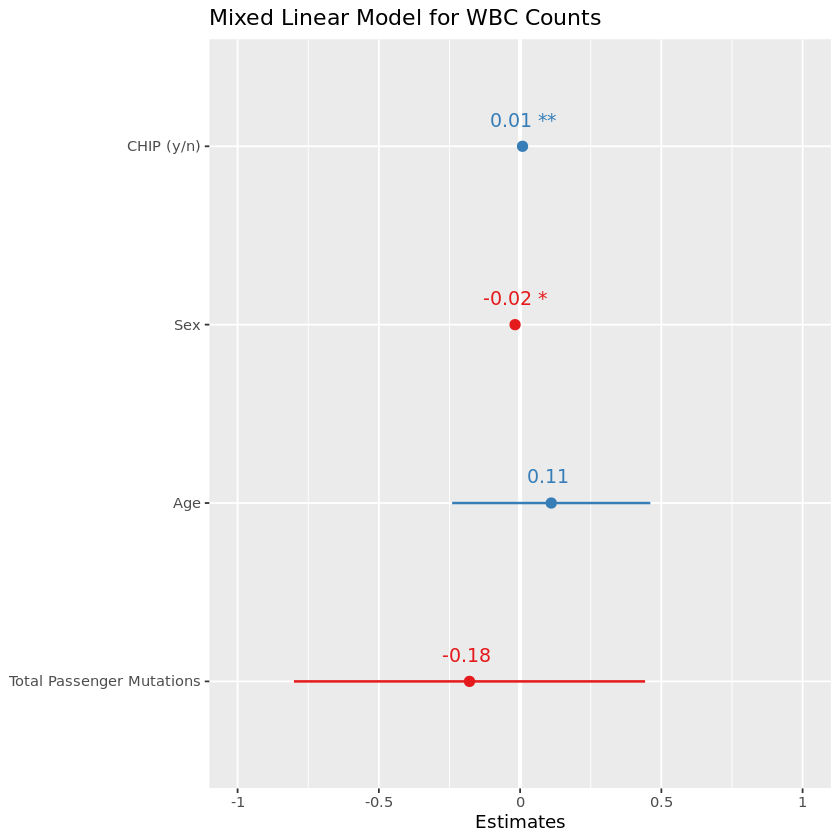

In [13]:
sjPlot::plot_model(res,axis.labels=c("Total Passenger Mutations", "Age", "Sex", "CHIP (y/n)"),
                   show.values=TRUE, show.p=TRUE, title="Mixed Linear Model for WBC Counts")